# 1. Wczytanie danych i bibliotek

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from matplotlib import pyplot as plt

In [16]:
data = pd.read_csv("../data/to_model/new_york_listings_2024_to_model.csv");
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,718037328155265207,Rental unit in Queens · 5 bedrooms · 8 beds · ...,204539,Mark,Queens,Ridgewood,40.70262,-73.89800,Entire home/apt,471.0,...,2022-11-03,0.07,9,365,0,No License,No rating,5,8,2
1,5536638,Rental unit in Brooklyn · ★4.60 · 2 bedrooms ·...,28709982,Sidiq,Brooklyn,Williamsburg,40.72027,-73.95513,Entire home/apt,225.0,...,2023-09-13,0.49,5,90,7,No License,4.60,2,2,1
2,4605840,Rental unit in Brooklyn · ★4.93 · 1 bedroom · ...,23788242,Suzanne,Brooklyn,Bedford-Stuyvesant,40.68670,-73.94856,Private room,80.0,...,2023-11-17,1.00,2,363,12,No License,4.93,1,1,1
3,594240338554500815,Rental unit in New York · 1 bedroom · 1 bed · ...,384559808,Best Inns USA,Manhattan,East Village,40.73221,-73.98689,Entire home/apt,83.0,...,2023-08-11,0.12,30,106,1,No License,No rating,1,1,1
4,26785,Rental unit in Brooklyn · ★4.93 · 1 bedroom · ...,42273,Dani,Brooklyn,South Slope,40.66860,-73.98723,Entire home/apt,90.0,...,2022-05-31,2.90,3,188,0,No License,4.93,1,1,1


# 2. Wnioski po EDA
- 1606 wierszy i 22 kolumny
- brak wartości Null
- bylo pare kolumn o dziwnych typach - object (baths, bedrooms, rating, license)

Zmiany, które przeprowadziliśmy:
- usunelismy kolumny 'id', 'name', 'host_id', 'host_name' (są to wartości w większości unikalne)
- mapujemy kolumnę 
        - 'license' na 0 i 1 (0 - brak licencji, 1 - licencja)
        - 'baths' na int (jeśli nie jest podana to 0)
        - 'bedrooms' na int (jeśli nie jest podana to 0, a jeśli jest studio to 1)
        - 'rating' na float (jeśli nie ma to NaN)
        
Ostatecznie uzyskalismy 11 zmiennych ilosciowych i 4 kategoryczne

### Przygotowanie danych zgodnie z wnioskami z EDA

In [17]:
def lic_mapper(a):
    if a == "No License" or a == "Exempt":
        return 0
    else:
        return 1

def bath_mapper(a):
    if a == "Not specified":
        return 0
    else:
        return int(float(a))
def bedroom_mapper(a): # Uznałem, że posiadanie studio (czyli całe mieszkanie w jednym większym pokoju) to tak jakby była jedna sypialnia
    if a == "Studio":
        return 1
    else:
        return int(a)
def rating_mapper(a): # na razie tak może zostać
    if a == "New " or a == "No rating":
        return np.nan
    else:
        return float(a)
data["license"] = data["license"].map(lic_mapper)  # Jeśli ma licencję to 1, jeśli nie to 0
data["baths"] = data["baths"].map(bath_mapper)
data["bedrooms"] = data["bedrooms"].map(bedroom_mapper)
data["rating"] = data["rating"].map(rating_mapper)
data["last_review"] =  data["last_review"].map(np.datetime64) # Zmapowałem też date ostatniej opinii do przeznaczonego do tego typu
data = data.drop(["id", "name", "host_id", "host_name"], axis = 1) 
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,Queens,Ridgewood,40.702620,-73.898000,Entire home/apt,471.0,30,1,2022-11-03,0.07,9,365,0,0,NaN,5,8,2
1,Brooklyn,Williamsburg,40.720270,-73.955130,Entire home/apt,225.0,30,52,2023-09-13,0.49,5,90,7,0,4.60,2,2,1
2,Brooklyn,Bedford-Stuyvesant,40.686700,-73.948560,Private room,80.0,30,101,2023-11-17,1.00,2,363,12,0,4.93,1,1,1
3,Manhattan,East Village,40.732210,-73.986890,Entire home/apt,83.0,30,2,2023-08-11,0.12,30,106,1,0,NaN,1,1,1
4,Brooklyn,South Slope,40.668600,-73.987230,Entire home/apt,90.0,30,479,2022-05-31,2.90,3,188,0,0,4.93,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,Brooklyn,Bedford-Stuyvesant,40.686001,-73.943693,Entire home/apt,135.0,30,15,2023-01-10,0.97,1,262,1,0,4.87,3,3,1
16602,Queens,Corona,40.745100,-73.864880,Private room,68.0,30,16,2023-10-16,2.68,2,180,16,0,4.69,1,1,1
16603,Bronx,Allerton,40.867770,-73.860180,Entire home/apt,100.0,30,30,2023-10-07,2.21,5,365,24,0,4.73,1,1,1
16604,Manhattan,Harlem,40.830791,-73.949509,Private room,50.0,30,19,2023-12-10,0.21,4,42,1,0,4.84,1,1,1


Trzeba sie zastanowic czy zostawic nieighborhood_group, neighborhood czy latitude i longitude

In [18]:
data["neighbourhood"].unique()

array(['Ridgewood', 'Williamsburg', 'Bedford-Stuyvesant', 'East Village',
       'South Slope', 'Dyker Heights', 'West Village', 'Bushwick',
       'Crown Heights', 'Astoria', 'Gramercy', 'East Harlem',
       'Prospect Heights', 'Flatbush', 'Kingsbridge', 'Cypress Hills',
       'East Flatbush', 'Jamaica', 'Springfield Gardens', 'Brownsville',
       "Hell's Kitchen", 'Laurelton', 'Middle Village', 'Upper West Side',
       'Forest Hills', 'Harlem', 'East New York', 'Nolita',
       'Downtown Brooklyn', 'Bensonhurst', 'Fort Greene', 'Flushing',
       'Prospect-Lefferts Gardens', 'Hunts Point', 'Greenwich Village',
       'Melrose', 'Stapleton', 'Coney Island', 'Washington Heights',
       'Upper East Side', 'Clinton Hill', 'Financial District',
       'Elmhurst', 'Norwood', 'Stuyvesant Town', 'Mott Haven', 'Inwood',
       'Tribeca', 'Clifton', 'St. Albans', 'Mount Eden',
       'Ditmars Steinway', 'Mount Hope', 'Lower East Side', 'Chinatown',
       'Greenpoint', 'Little Italy', 'Br

w neighborhood jest az 218 unikalnych wartosci, wiec raczej nie warto zostawic - predzej moze neighborhood_group bo tam jest ich mniej
Jendak nadal wtedy bedzie probelm z encodingiem.
Dlatego moze warto zostawic latitude i longitude, bo to sa juz jakies liczby, a przenosza te same informacje co neighborhood_group

In [57]:
df = data.copy()
df = df.drop(["neighbourhood", "neighbourhood_group"], axis = 1)
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,40.702620,-73.898000,Entire home/apt,471.0,30,1,2022-11-03,0.07,9,365,0,0,NaN,5,8,2
1,40.720270,-73.955130,Entire home/apt,225.0,30,52,2023-09-13,0.49,5,90,7,0,4.60,2,2,1
2,40.686700,-73.948560,Private room,80.0,30,101,2023-11-17,1.00,2,363,12,0,4.93,1,1,1
3,40.732210,-73.986890,Entire home/apt,83.0,30,2,2023-08-11,0.12,30,106,1,0,NaN,1,1,1
4,40.668600,-73.987230,Entire home/apt,90.0,30,479,2022-05-31,2.90,3,188,0,0,4.93,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,40.686001,-73.943693,Entire home/apt,135.0,30,15,2023-01-10,0.97,1,262,1,0,4.87,3,3,1
16602,40.745100,-73.864880,Private room,68.0,30,16,2023-10-16,2.68,2,180,16,0,4.69,1,1,1
16603,40.867770,-73.860180,Entire home/apt,100.0,30,30,2023-10-07,2.21,5,365,24,0,4.73,1,1,1
16604,40.830791,-73.949509,Private room,50.0,30,19,2023-12-10,0.21,4,42,1,0,4.84,1,1,1


Ostatecznie mamy 16 kolumn, w tym 14 zmiennych ilościowych i 1 kategoryczną (+ 1 zmienna z datą)

In [58]:
numerical = ["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm", "license", "beds", "rating", "bedrooms", "baths", "latitude", "longitude"]
categorical = ["room_type"]
date = ["last_review"]

# 3. inzynieria cech

## 3.1. Zmienne kategoryczne

In [59]:
# sprawdzanie unikalnych wartosci w zmiennych kategorycznych
for col in categorical:
    print(col, df[col].unique())

room_type ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']


room type ma tylko 4 wartosci unikalne, dlatego zastanawiam sie miedzy ordinal encoding a label encoding
zdecydowalam sie na ordinal encoding

In [60]:
# ordinal encoding
room_type_map = {
    'Entire home/apt' : 3,
    "Hotel room": 2,
    "Private room": 1,
    "Shared room": 0 
}
df["room_type"] = df["room_type"].map(room_type_map)
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,40.702620,-73.898000,3,471.0,30,1,2022-11-03,0.07,9,365,0,0,NaN,5,8,2
1,40.720270,-73.955130,3,225.0,30,52,2023-09-13,0.49,5,90,7,0,4.60,2,2,1
2,40.686700,-73.948560,1,80.0,30,101,2023-11-17,1.00,2,363,12,0,4.93,1,1,1
3,40.732210,-73.986890,3,83.0,30,2,2023-08-11,0.12,30,106,1,0,NaN,1,1,1
4,40.668600,-73.987230,3,90.0,30,479,2022-05-31,2.90,3,188,0,0,4.93,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,40.686001,-73.943693,3,135.0,30,15,2023-01-10,0.97,1,262,1,0,4.87,3,3,1
16602,40.745100,-73.864880,1,68.0,30,16,2023-10-16,2.68,2,180,16,0,4.69,1,1,1
16603,40.867770,-73.860180,3,100.0,30,30,2023-10-07,2.21,5,365,24,0,4.73,1,1,1
16604,40.830791,-73.949509,1,50.0,30,19,2023-12-10,0.21,4,42,1,0,4.84,1,1,1


## 3.2. Zmienne daty

zastanawiam sie nad ususnieciem tej kolumny, bo nie wiem czy bedzie ona wazna
a jesli ja zostawiamy to nie wiem jak ja zakodowac

## 3.3. Outliery

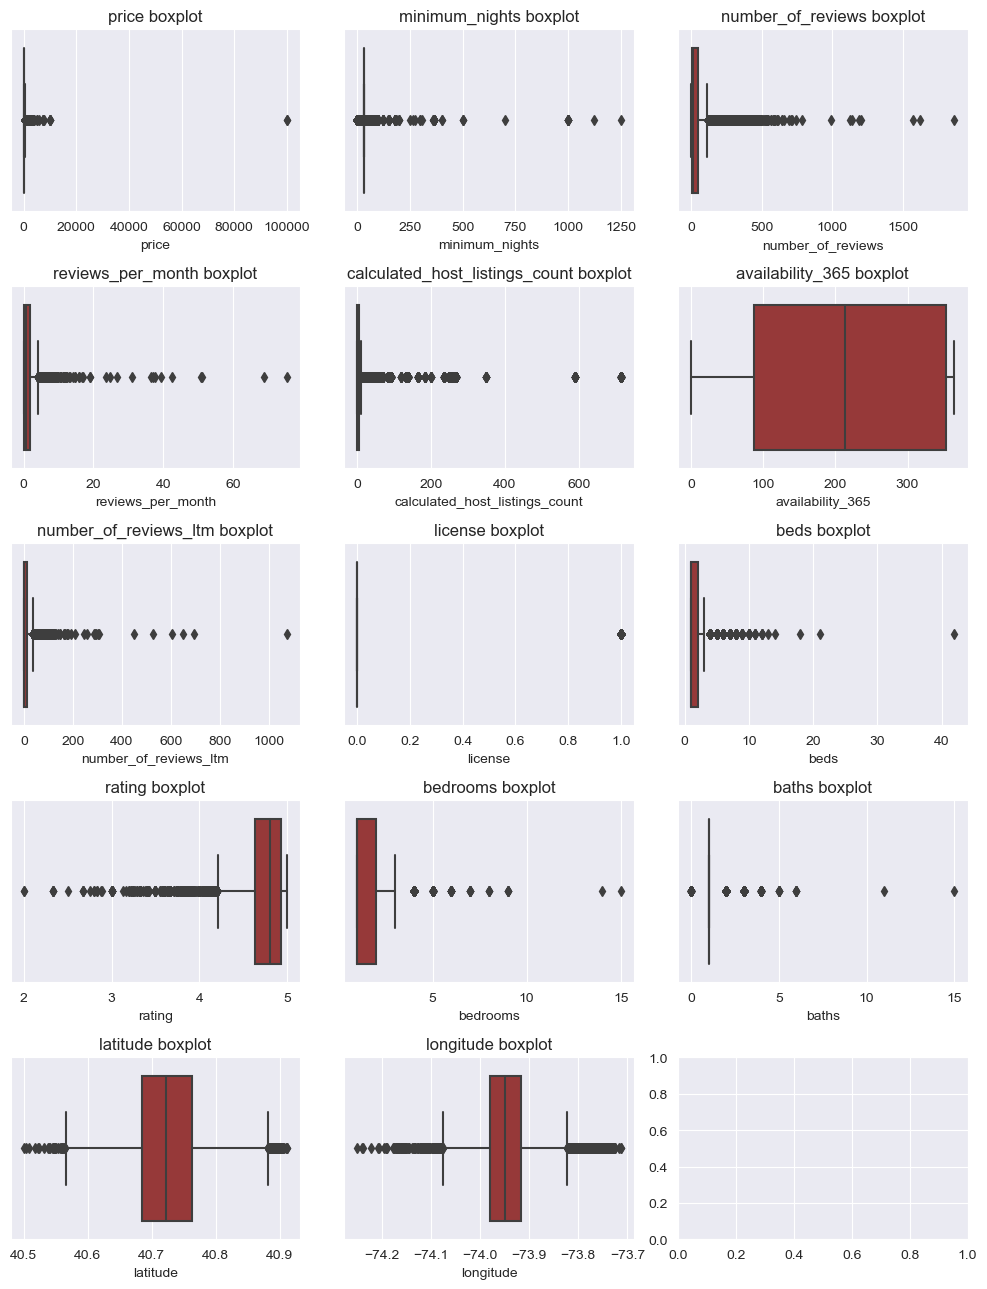

In [61]:
#pokazujemy oprocz zmiennej license, bo to zmienna binarna
fig, axs = plt.subplots(5, 3, figsize = (10, 13))
axs = axs.flatten()

# nasze numeryczne
for i, col in enumerate(numerical):
    sns.boxplot(data = df, x = col, ax=axs[i], color = "brown").set(title = col + " boxplot")

plt.tight_layout()
plt.show()

### 3.3.1. Pyod

In [62]:
#usuwamy outliery oprocz dla zmiennyc binarnych (license), zmiennej kategorycznej (room_type), daty (last_review), wspolrzednych (latitude, longitude) oraz ratingu (bo ma duzo Nan)
cols_rest = [cols for cols in df.columns if cols not in ["license", "room_type", "last_review", "latitude", "longitude", "rating"]]

from pyod.models.knn import KNN
clf = KNN(contamination=0.04)
clf.fit(df[cols_rest])
df['outliers'] = clf.labels_
df['outliers'].value_counts()

0    15941
1      665
Name: outliers, dtype: int64

In [63]:
# usuwamy outliery
df = df[df['outliers'] == 0]
df = df.drop('outliers', axis = 1)
df

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,40.702620,-73.898000,3,471.0,30,1,2022-11-03,0.07,9,365,0,0,NaN,5,8,2
1,40.720270,-73.955130,3,225.0,30,52,2023-09-13,0.49,5,90,7,0,4.60,2,2,1
2,40.686700,-73.948560,1,80.0,30,101,2023-11-17,1.00,2,363,12,0,4.93,1,1,1
3,40.732210,-73.986890,3,83.0,30,2,2023-08-11,0.12,30,106,1,0,NaN,1,1,1
5,40.625140,-74.004700,1,79.0,30,15,2023-12-13,3.08,4,334,15,0,4.93,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16601,40.686001,-73.943693,3,135.0,30,15,2023-01-10,0.97,1,262,1,0,4.87,3,3,1
16602,40.745100,-73.864880,1,68.0,30,16,2023-10-16,2.68,2,180,16,0,4.69,1,1,1
16603,40.867770,-73.860180,3,100.0,30,30,2023-10-07,2.21,5,365,24,0,4.73,1,1,1
16604,40.830791,-73.949509,1,50.0,30,19,2023-12-10,0.21,4,42,1,0,4.84,1,1,1


Sprawdżmy jak teraz wyglądają wykresy

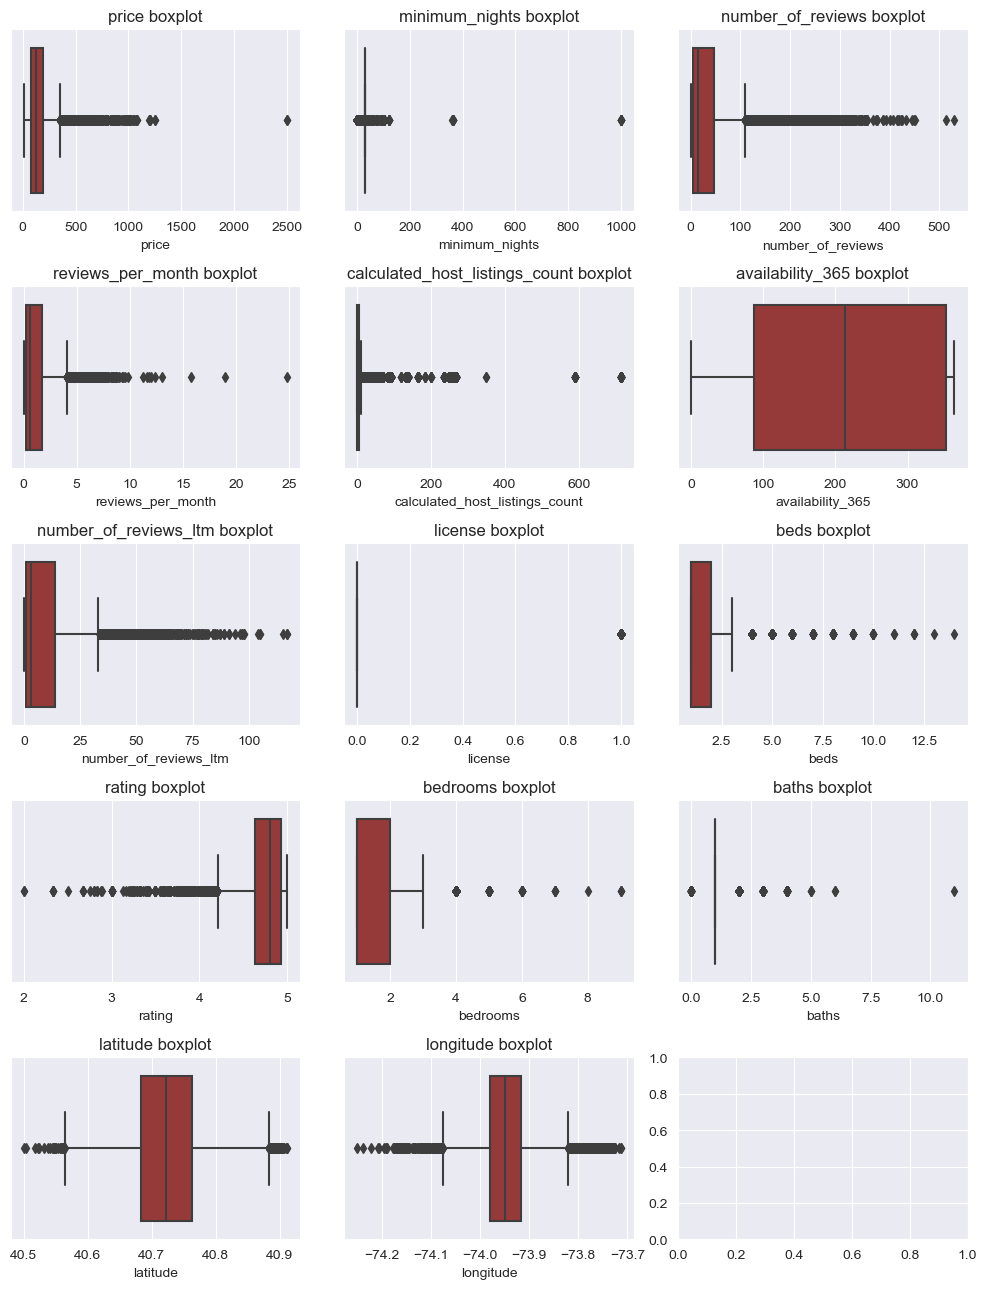

In [42]:
fig, axs = plt.subplots(5, 3, figsize = (10, 13))
axs = axs.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(data = df, x = col, ax=axs[i], color = "brown").set(title = col + " boxplot")

plt.tight_layout()
plt.show()

## 3.3. Transformacja danych

In [53]:
#bedziemyteraz operowac tylko na niektorych kolumnach - bez dat, kategorycznych, binarnych
rest_cols = [cols for cols in df.columns if cols not in ["license", "room_type", "last_review"]]

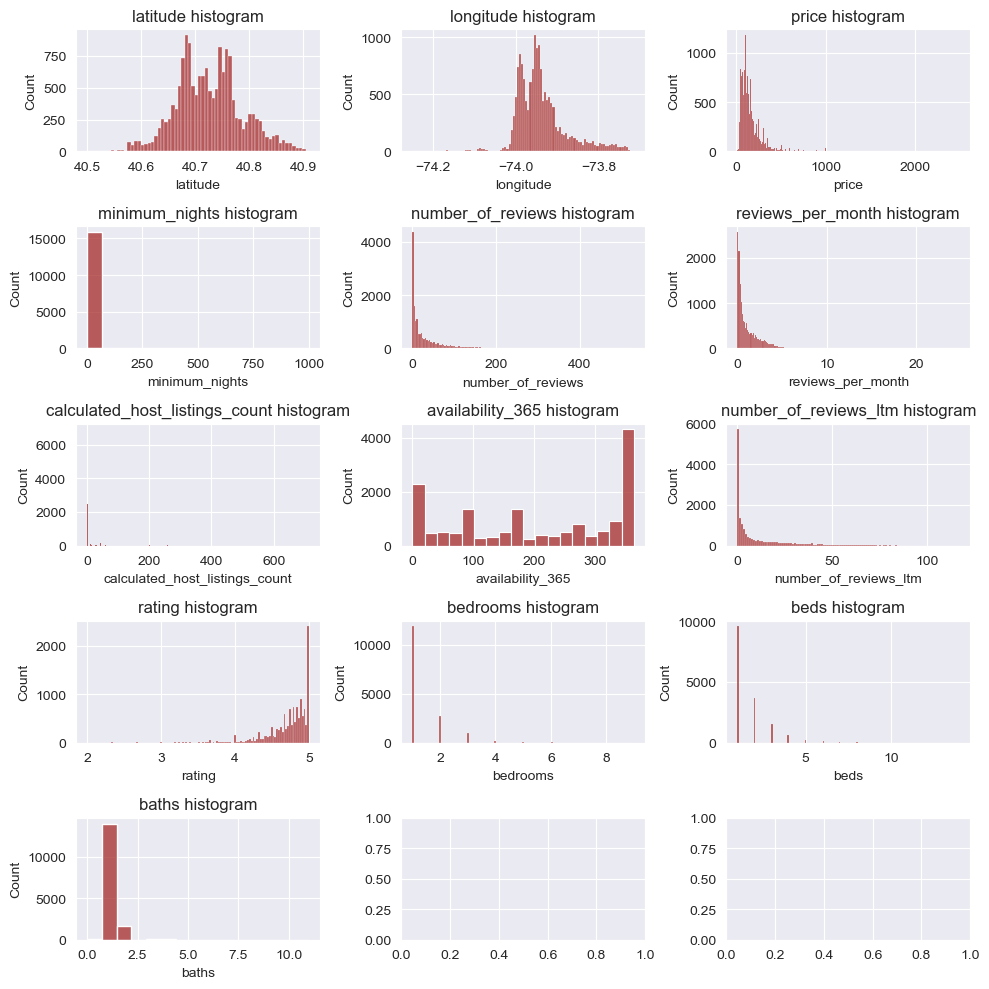

In [55]:
# zobaczmy rozklady zmiennych - histogramy
fig, axs = plt.subplots(5, 3, figsize = (10, 10))
axs = axs.flatten()
for i, col in enumerate(rest_cols):
    sns.histplot(data = df, x = col, ax=axs[i], color = "brown").set(title = col + " histogram")
plt.tight_layout()
plt.show()

### 3.3.1. Normalizacja
pojawia sie ogolnie pytanie co do normalizacji i standaryzacji wspolrzednych geograficznych, ale chyba nalezy cos z nimi zrobic

#### Transformacja Yeo-Johnson

C:\Users\domin\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1500: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
C:\Users\domin\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\domin\anaconda3\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


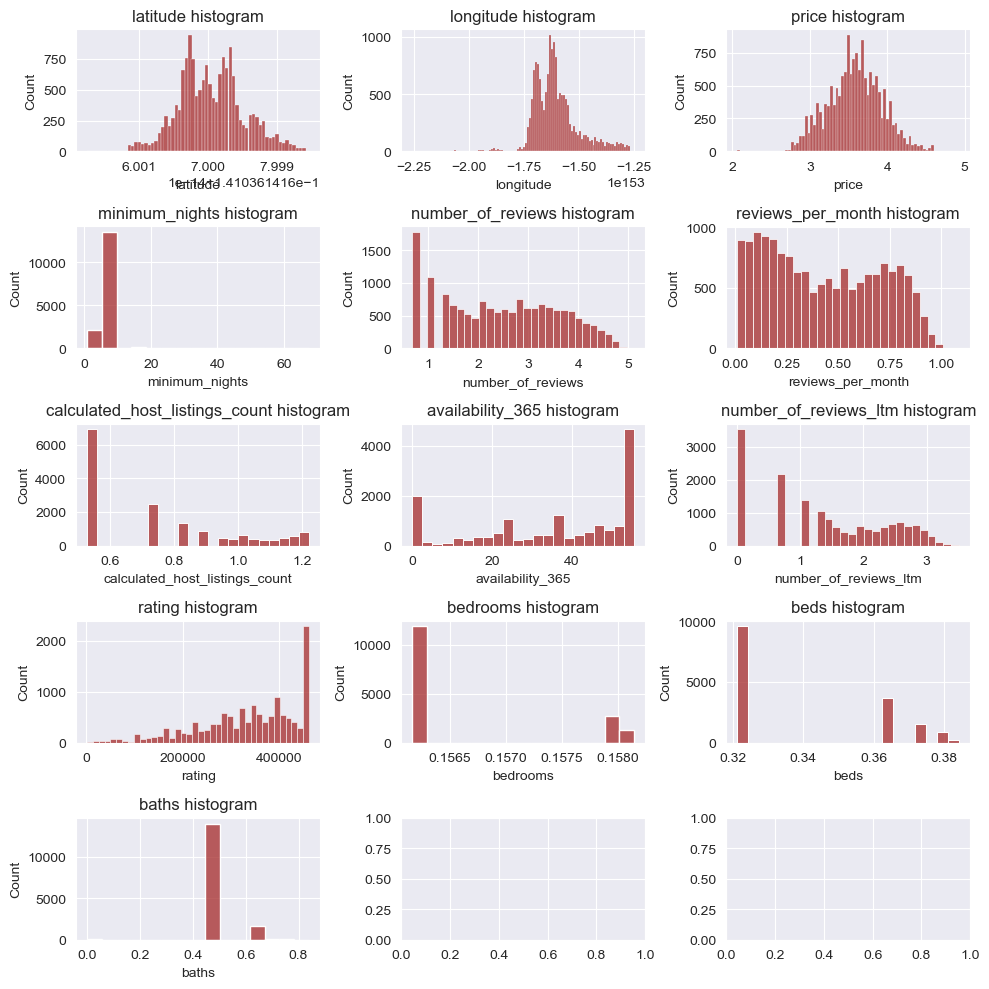

In [68]:
from scipy.stats import yeojohnson
df_yeo = df.copy()
for col in rest_cols:
    df_yeo[col], _ = yeojohnson(df[col])
#histogram
fig, axs = plt.subplots(5, 3, figsize = (10, 10))
axs = axs.flatten()
for i, col in enumerate(rest_cols):
    sns.histplot(data = df_yeo, x = col, ax=axs[i], color = "brown").set(title = col + " histogram")
plt.tight_layout()
plt.show()

### 3.3.2. Standaryzacja
Bede to wykonywac na danych po transformacji Yeo-Johnsona

#### standard scaler

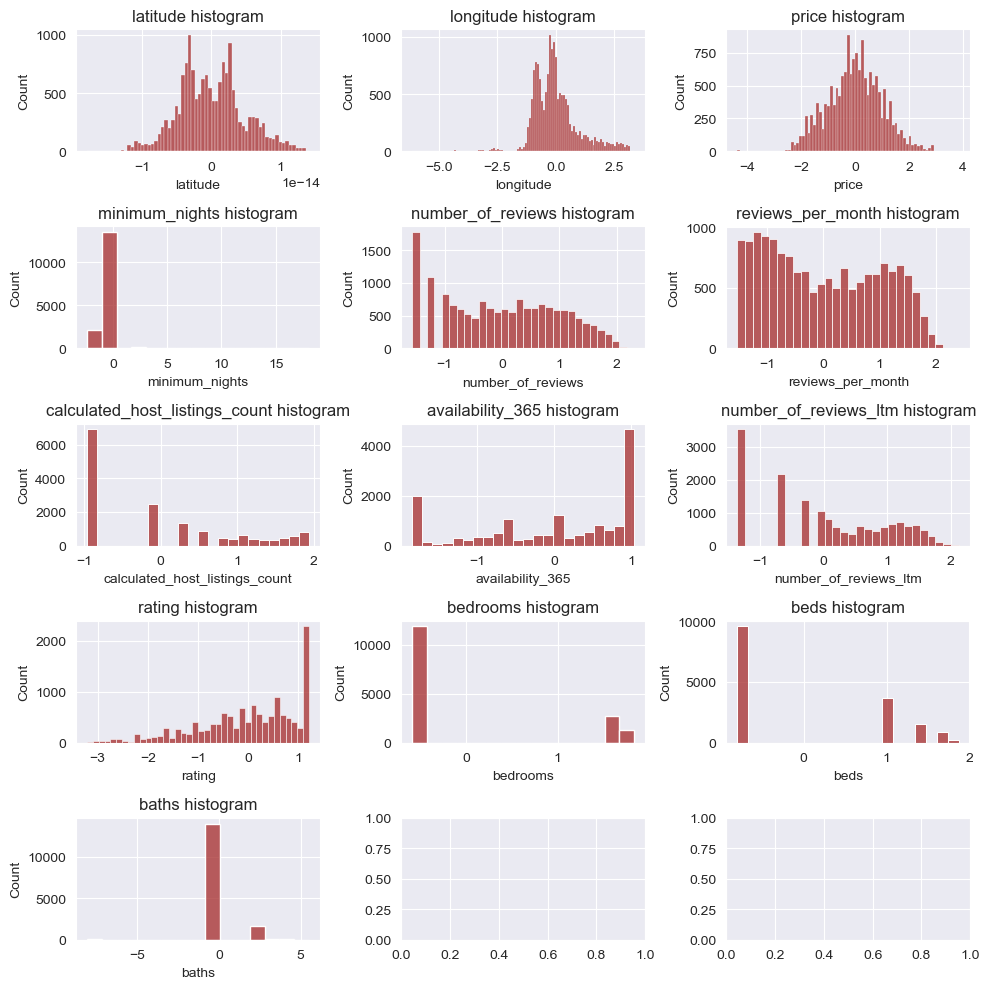

In [70]:
from sklearn.preprocessing import StandardScaler
df_standardScaler = df_yeo.copy()
scaler = StandardScaler()
df_standardScaler[rest_cols] = scaler.fit_transform(df_standardScaler[rest_cols])
df_standardScaler
#histogram
fig, axs = plt.subplots(5, 3, figsize = (10, 10))
axs = axs.flatten()
for i, col in enumerate(rest_cols):
    sns.histplot(data = df_standardScaler, x = col, ax=axs[i], color = "brown").set(title = col + " histogram")
plt.tight_layout()

#### minmax scaler

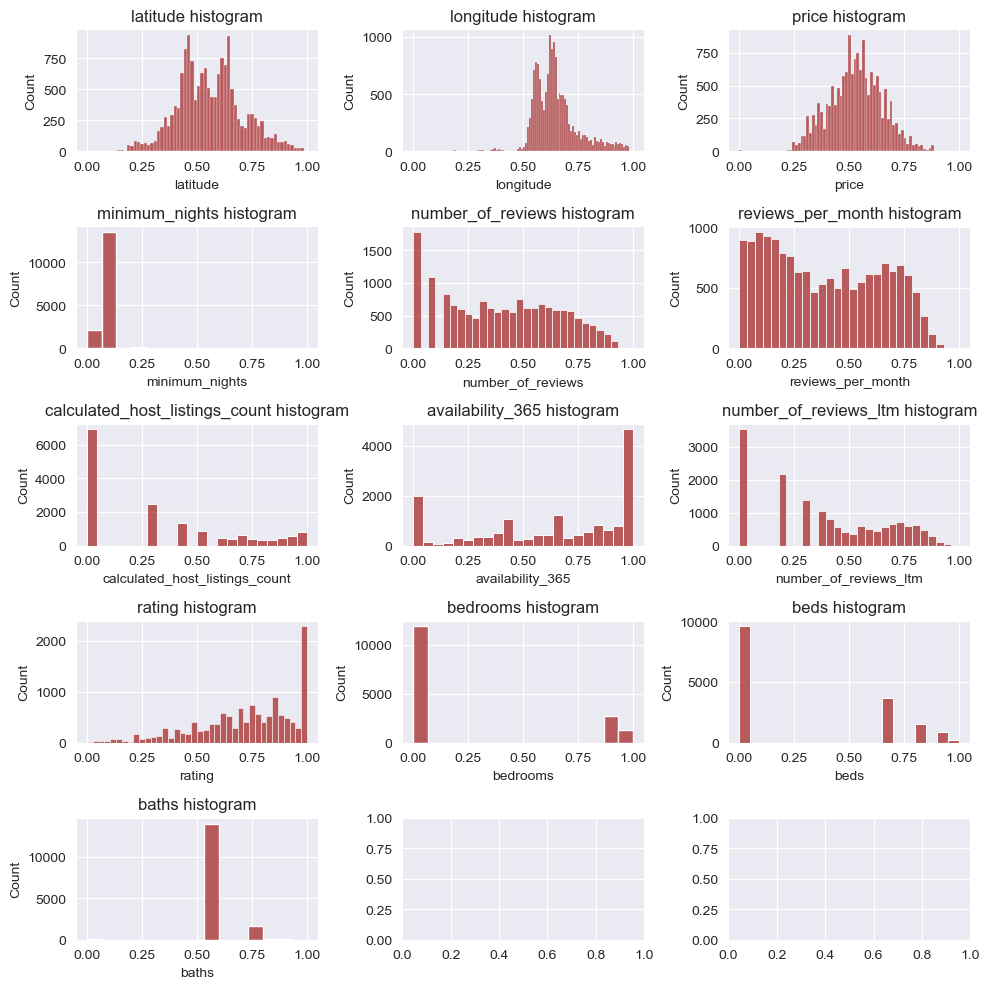

In [71]:
from sklearn.preprocessing import MinMaxScaler
df_minmaxScaler = df_yeo.copy()
scaler = MinMaxScaler()
df_minmaxScaler[rest_cols] = scaler.fit_transform(df_minmaxScaler[rest_cols])
df_minmaxScaler
#histogram

fig, axs = plt.subplots(5, 3, figsize = (10, 10))
axs = axs.flatten()
for i, col in enumerate(rest_cols):
    sns.histplot(data = df_minmaxScaler, x = col, ax=axs[i], color = "brown").set(title = col + " histogram")
plt.tight_layout()
plt.show()

# 4. Wstępne modele